# Week 13 Problem 1

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do not write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select *Kernel*, and restart the kernel and run all cells (*Restart & Run all*).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select *File* → *Save and CheckPoint*)

5. When you are ready to submit your assignment, go to *Dashboard* → *Assignments* and click the *Submit* button. Your work is not submitted until you click *Submit*.

6. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

7. **If your code does not pass the unit tests, it will not pass the autograder.**

# Due Date: 6 PM, April 23, 2018

## Author: Kelechi Ikegwu
### Primary Reviewer: John Nuygen 

In [1]:
import numpy as np

import numpy.testing as npt
from nose.tools import assert_equal, assert_almost_equal, assert_true, assert_false


import matplotlib.pyplot as plt
%matplotlib inline

### Problem 1.1

We'll use Bayes Theorem to compute the probability of a sporting event $A_1$ occuring and the condition is that the parking lot for the event is full $B$. Let $A_2$ represent an academic event and $A_3$ represent there being no event. Complete the function *BayesSport* by calculating $P(A_1 | B)$ and returning the value.

The following values will be passed in BayesSport:
- p_a1 = $P(A_1)$  
- p_a2 = $P(A_2)$  
- p_a3 = $P(A_3)$  
- p_ba1 = $P(B | A_1)$  
- p_ba2 = $P(B | A_2)$  
- p_ba3 = $P(B | A_3)$  

These should values be used to calculate and return $P(A_1 | B)$.


In [2]:
def BayesSport(p_a1, p_a2, p_a3, p_ba1, p_ba2, p_ba3):
    '''
    Parameters
    ----------
    p_a1 : floating point number containing value for P(A1) 
    p_a2 : floating point number containing value for P(A2) 
    p_a3 : floating point number containing value for P(A3) 
    p_ba1 : floating point number containing value for P(B|A1)P 
    p_ba2 : floating point number containing value for P(B|A2)P 
    p_ba3 : floating point number containing value for P(B|A3)P
    
    Returns
    -------
    P(A1|B) floating point number
    '''
    # YOUR CODE HERE
    pab = p_a1 * p_ba1
    pb = p_ba1*p_a1 + p_a2*p_ba2 + p_a3*p_ba3
    p_a1b = pab/pb
    
    return p_a1b

In [3]:
prob1 = BayesSport(0.20, 0.35, 0.45, 0.70, 0.25, 0.05)
assert_equal(prob1, 0.56)

prob2 = BayesSport(0.21, 0.25, 0.35, 0.65, 0.28, 0.09)
assert_almost_equal(prob2, 0.57, 2)

prob3 = BayesSport(0.24, 0.29, 0.38, 0.61, 0.23, 0.29)
assert_almost_equal(prob3, 0.45, 2)


### Problem 1.2
We'll use Bayes Theorem again for a series of medical tests. We will compute the posterior probability of a person having cancer given their test results came back positive. Use the *prior* (the probability of a person having cancer), *p_no_cancer* (the probability of person's test coming back positive for cancer given that the person does not not have cancer), and *p_cancer* (the probability of person's test coming back positive for cancer given that the person has cancer ).

In [4]:

def calc_posterior_cancer(prior, p_no_cancer, p_cancer):
    '''
    Parameters
    ----------
    prior: floating point number probability of having cancer
    p_no_cancer: floating point number Probability of being diganosed with cancer given that you do not have cancer
    p_no_cancer: numpy array containing probabilities of being diganosed with cancer given that you do have cancer
    Returns
    ------
    posterior: numpy array containing posteriors for each test
    '''
    # YOUR CODE HERE
    posterior = prior * p_cancer /(prior*p_cancer + (1-prior)*(p_no_cancer))
    
    
    return posterior
    

In [5]:
np.random.seed(0)
prior = 0.037
p_no_cancer = 0.005
# 100 trials, 3.7% chance of having cancer, 200 observations
n = 50
p_cancer = np.random.binomial(n, prior, 200) / n
posterior = calc_posterior_cancer(prior, p_no_cancer, p_cancer)

assert_true(isinstance(posterior, np.ndarray))
assert_equal(len(posterior), 200)
npt.assert_almost_equal(posterior, [0.235, 0.235, 0.235, 0.235, 0.133, 0.235, 0.133, 0.381, 0.435, 0.133, 0.316, 0.235, 0.235, 0.381, 0.0, 0.0, 0.0, 0.316, 0.316, 0.316, 0.435, 0.316, 0.235, 0.316, 0.0, 0.235, 0.0, 0.381, 0.235, 0.133, 0.133, 0.316, 0.235, 0.235, 0.0, 0.235, 0.235, 0.235, 0.381, 0.235, 0.133, 0.133, 0.235, 0.0, 0.235, 0.235, 0.133, 0.0, 0.133, 0.133, 0.235, 0.133, 0.435, 0.0, 0.133, 0.133, 0.235, 0.133, 0.235, 0.133, 0.133, 0.0, 0.235, 0.0, 0.133, 0.133, 0.316, 0.0, 0.316, 0.0, 0.435, 0.235, 0.435, 0.235, 0.316, 0.0, 0.133, 0.0, 0.133, 0.0, 0.133, 0.133, 0.0, 0.235, 0.235, 0.133, 0.235, 0.0, 0.235, 0.381, 0.133, 0.235, 0.0, 0.235, 0.133, 0.133, 0.235, 0.0, 0.316, 0.0, 0.235, 0.133, 0.316, 0.381, 0.133, 0.235, 0.235, 0.235, 0.133, 0.381, 0.235, 0.316, 0.235, 0.133, 0.316, 0.133, 0.316, 0.235, 0.316, 0.235, 0.316, 0.235, 0.381, 0.235, 0.133, 0.235, 0.0, 0.133, 0.235, 0.133, 0.235, 0.133, 0.0, 0.133, 0.235, 0.235, 0.235, 0.235, 0.235, 0.133, 0.381, 0.133, 0.133, 0.381, 0.316, 0.235, 0.0, 0.381, 0.235, 0.518, 0.0, 0.316, 0.133, 0.235, 0.0, 0.316, 0.316, 0.235, 0.133, 0.0, 0.235, 0.235, 0.316, 0.316, 0.435, 0.316, 0.0, 0.133, 0.316, 0.133, 0.235, 0.0, 0.133, 0.0, 0.316, 0.133, 0.133, 0.381, 0.235, 0.0, 0.133, 0.235, 0.235, 0.133, 0.381, 0.235, 0.235, 0.235, 0.316, 0.133, 0.133, 0.133, 0.133, 0.381, 0.316, 0.235, 0.133, 0.133, 0.0, 0.133], decimal=2)


### Problem 1.3

We'll plot the results from Problem 1.2 in this problem.  Use the axes object passed into the plot function to plot x and y, where x is a numpy array from 0 to 200 and y are posterior probabilies from problem 1.2.

Your plot should look similar to: ![Imgur](https://i.imgur.com/kHYYUrI.png)

In [10]:

def plot(ax, x, y):
    '''
    Parameters
    ----------
    ax : axes object of type mpl.axes._subplots.AxesSubplot
    x : numpy array from 0 to 200
    y : posterior probabilities from Problem 1.2
    
    Returns
    -------
    returns axes object of type mpl.axes._subplots.AxesSubplot
    '''
    # YOUR CODE HERE
    ax.plot(x,y)
    ax.set(title = 'Bayes Theorem Test',
          xlabel='Number',
          ylabel='Probability')
    
    return ax

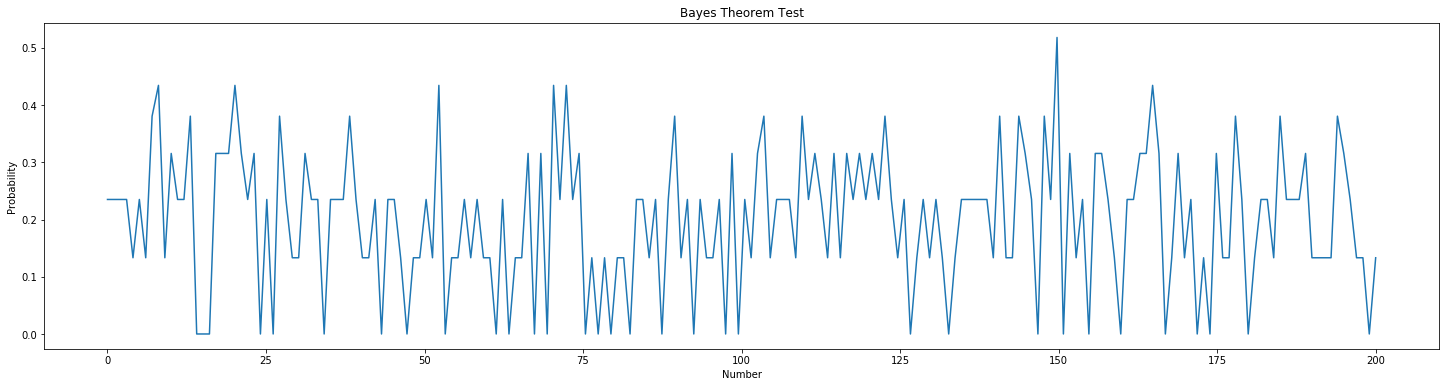

In [11]:

fig, axs = plt.subplots(figsize=(25,6))
ax = plot(axs, np.linspace(0,200,200), posterior)
assert_true(ax == axs)
assert_false(ax.get_title() == '', msg='Set Your title')
assert_false(ax.get_ylabel() == '', msg='Label the y axis')
assert_false(ax.get_xlabel() == '', msg='Label the x axis')
npt.assert_equal(ax.lines[0].get_ydata(), posterior)